**<font size='1.5' color = 'orange'>Problem Statement: Design a Artificial Neural Network Model for Obesity Classification</font>**

Dataset Link: https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset?select=Obesity+Classification.csv

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('Obesity Classification.csv')

#### Exploring `Age` Column

In [3]:
df['Age'].value_counts()

Age
25    2
22    2
52    2
47    2
42    2
     ..
59    1
62    1
67    1
72    1
11    1
Name: count, Length: 75, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

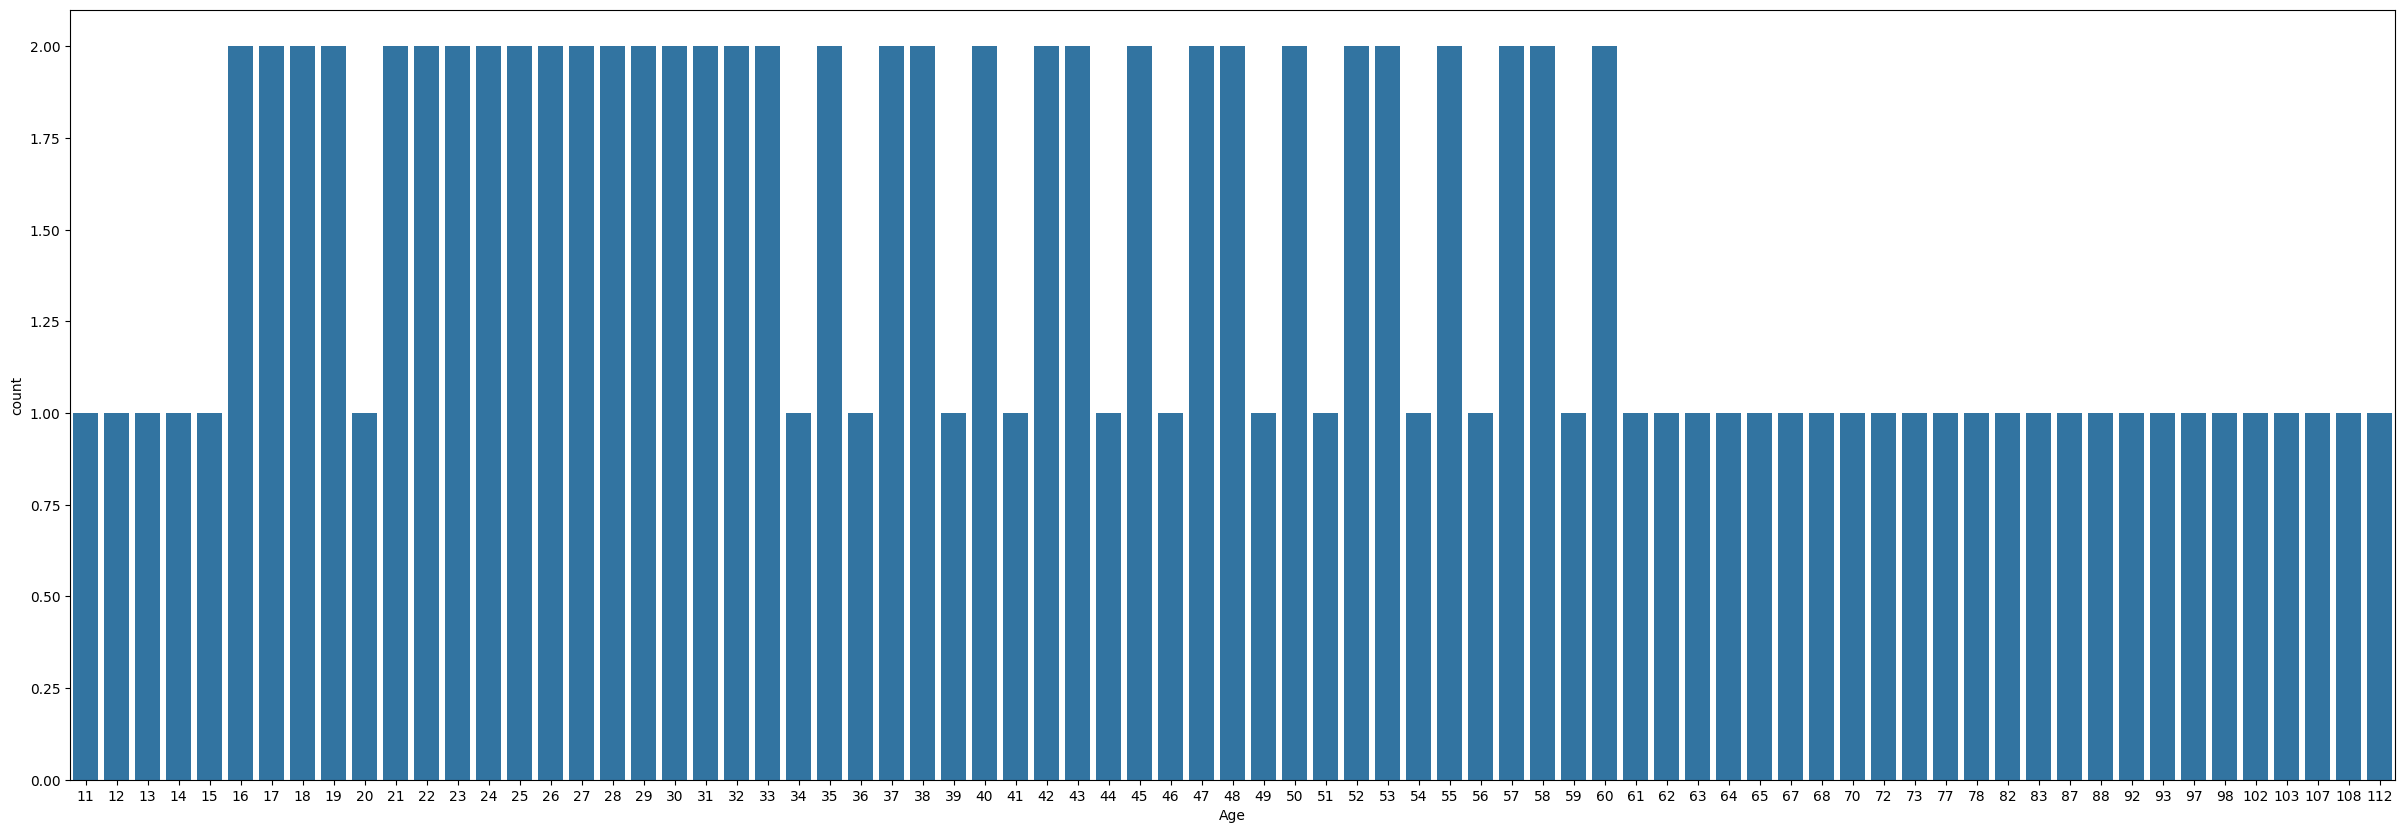

In [4]:
plt.figure(figsize=(30, 10))  # Width and height in inches
sns.countplot(x = 'Age',data=df)

#### Exploring `Gender` Column

In [5]:
df['Gender'].value_counts()

Gender
Male      56
Female    52
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

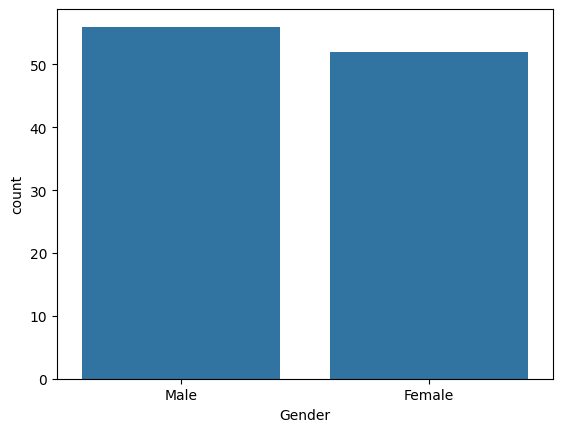

In [6]:
sns.countplot(x = 'Gender',data=df)

#### Exploring `Height` Column

In [7]:
df['Height'].value_counts()

Height
175    12
160    12
180    12
190    12
150    11
140    10
200    10
130    10
210    10
120     9
Name: count, dtype: int64

<Axes: xlabel='Height', ylabel='count'>

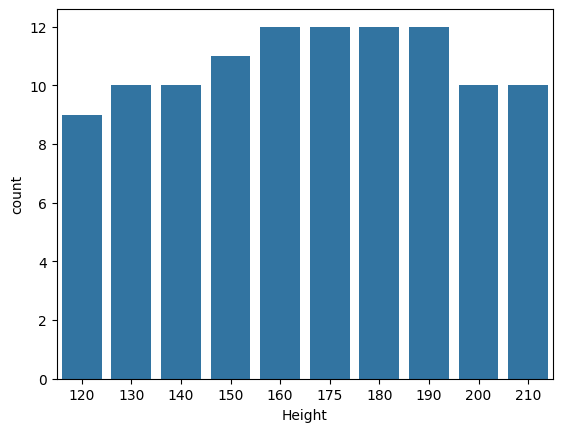

In [8]:
sns.countplot(x = 'Height',data=df)

#### Exploring `Weight` Column

In [9]:
df['Weight'].value_counts()

Weight
75     9
30     8
55     8
85     8
65     7
50     6
25     6
40     6
35     5
45     5
20     5
95     5
15     4
60     4
105    3
80     3
110    3
100    3
90     3
70     2
120    2
10     2
115    1
Name: count, dtype: int64

<Axes: xlabel='Weight', ylabel='count'>

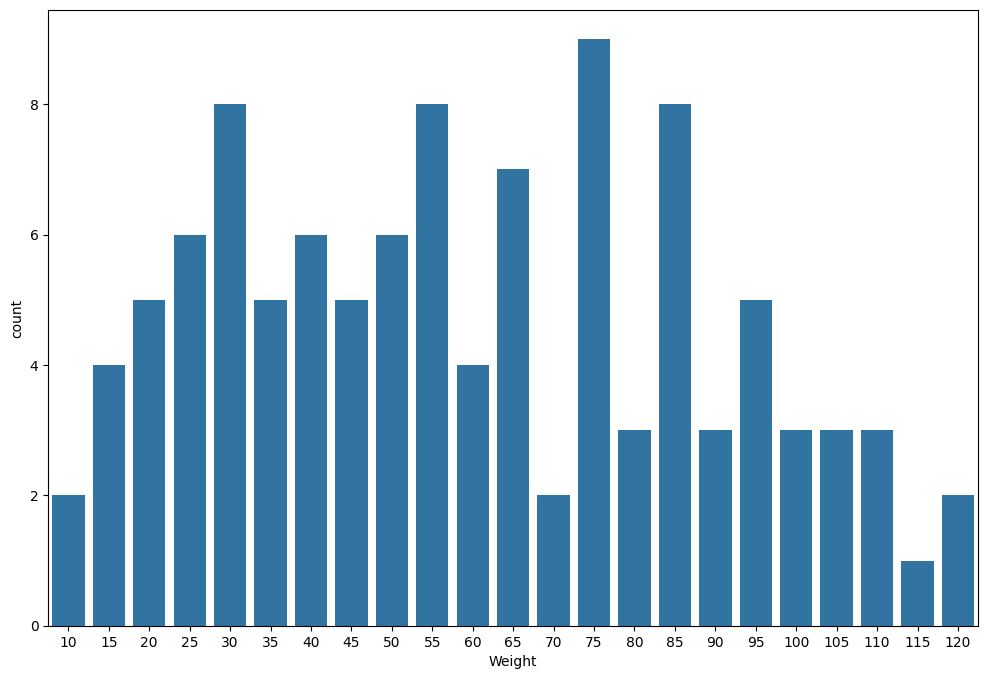

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Weight',data=df)

#### Exploring `BMI` Column

In [11]:
df['BMI'].value_counts()

BMI
16.7    11
21.2     8
13.3     8
22.7     7
10.0     7
20.0     6
18.7     5
24.2     5
26.1     5
5.6      4
8.3      4
22.5     4
27.0     4
25.0     4
28.9     3
27.5     3
25.3     3
34.2     3
31.2     3
27.3     3
23.4     2
37.2     2
3.9      2
30.8     1
29.1     1
Name: count, dtype: int64

<Axes: xlabel='BMI', ylabel='count'>

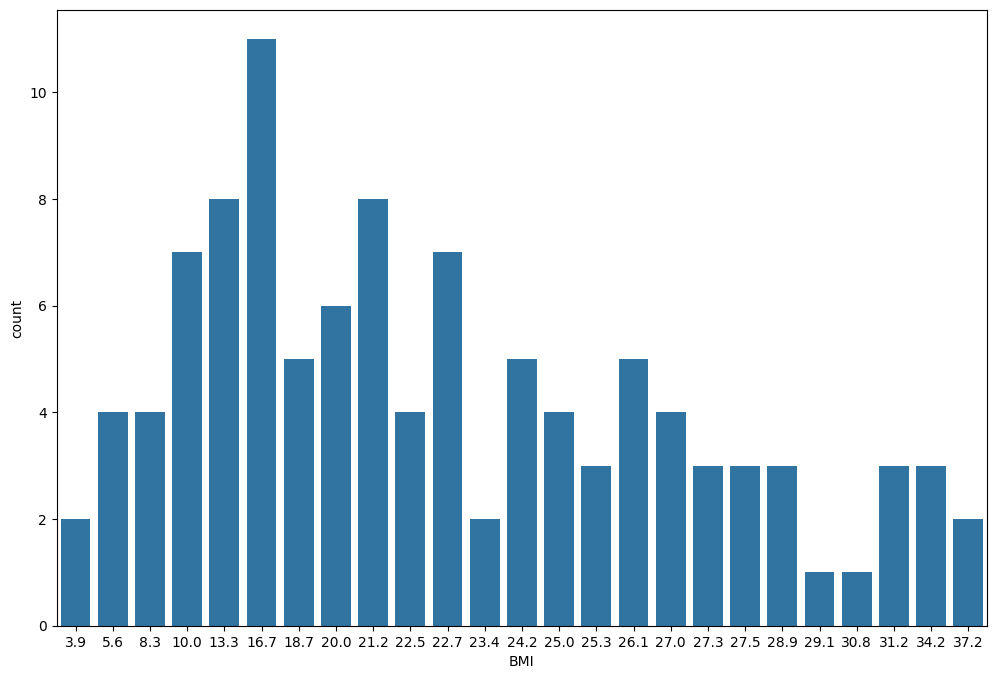

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'BMI',data=df)

#### Exploring `Label` Column

In [13]:
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

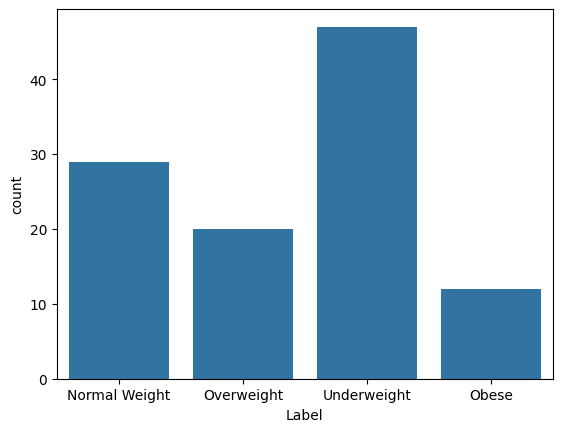

In [14]:
sns.countplot(x = 'Label',data=df)

# Data Preprocessing

In [15]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [16]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [17]:
# print(X)

In [18]:
# print(y)

### One Hot Encoding 'Gender' Column

In [19]:
from sklearn.preprocessing import LabelEncoder

le_gen = LabelEncoder()
X[:, 1] = le_gen.fit_transform(X[:, 1])

In [20]:
print(X)

[[25 1 175 80 25.3]
 [30 0 160 60 22.5]
 [35 1 180 90 27.3]
 [40 0 150 50 20.0]
 [45 1 190 100 31.2]
 [50 0 140 40 16.7]
 [55 1 200 110 34.2]
 [60 0 130 30 13.3]
 [65 1 210 120 37.2]
 [70 0 120 20 10.0]
 [18 1 175 70 23.4]
 [23 0 160 50 20.0]
 [28 1 180 80 25.3]
 [33 0 150 60 22.5]
 [38 1 190 90 27.3]
 [43 0 140 50 20.0]
 [48 1 200 100 31.2]
 [53 0 130 40 16.7]
 [58 1 210 110 34.2]
 [63 0 120 30 13.3]
 [68 1 175 80 25.3]
 [73 0 160 60 22.5]
 [78 1 180 90 27.3]
 [83 0 150 50 20.0]
 [88 1 190 100 31.2]
 [93 0 140 40 16.7]
 [98 1 200 110 34.2]
 [103 0 130 30 13.3]
 [108 1 210 120 37.2]
 [19 1 175 75 24.2]
 [24 0 160 55 21.2]
 [29 1 180 85 26.1]
 [39 1 190 95 27.0]
 [44 0 140 75 25.0]
 [49 1 200 105 28.9]
 [54 0 130 85 27.5]
 [59 1 210 115 30.8]
 [64 0 120 95 29.1]
 [17 1 175 65 22.7]
 [22 0 160 45 18.7]
 [27 1 180 75 24.2]
 [32 0 150 55 21.2]
 [37 1 190 85 26.1]
 [42 0 140 65 22.7]
 [47 1 200 95 27.0]
 [52 0 130 75 25.0]
 [57 1 210 105 28.9]
 [62 0 120 85 27.5]
 [67 1 175 65 22.7]
 [72 0 

### One Hot Encoding 'Label' Column

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
print(y)

[0 0 2 3 1 3 1 3 1 3 0 3 0 0 2 3 1 3 1 3 0 0 2 3 1 3 1 3 1 0 0 2 2 2 1 2 1
 2 0 3 0 0 2 0 2 2 1 2 0 3 0 0 2 0 2 2 1 2 0 3 0 3 0 0 2 0 2 2 3 3 0 3 0 3
 0 0 2 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output=False), [0])], remainder = 'passthrough')
y = np.array(ct.fit_transform(y.reshape(-1,1)))

In [24]:
print(y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1.

### Spilitting Dataset

In [25]:
#%60 for train, %28 for val, %12 for test
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=43, test_size= 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,random_state = 43,test_size = 0.3)

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 0.47552668, -1.09858844, -1.76337721,  0.47560688,  0.53526283],
       [ 1.32736073, -1.09858844, -0.68513382, -0.40412839, -0.13643955],
       [ 0.35936749,  0.91025899,  1.47135296,  1.70723625,  1.77119521],
       [-0.45374683,  0.91025899,  0.75252403,  0.82750099,  0.68303736],
       [ 0.32064776,  0.91025899,  1.47135296,  1.5312892 ,  1.05919069],
       [-0.80222439, -1.09858844, -0.68513382, -1.28386366, -1.4798443 ],
       [-1.42174007,  0.91025899,  0.21340234, -1.63575776, -2.0709424 ],
       [-0.76350467,  0.91025899,  0.39310957,  0.82750099,  0.68303736],
       [-0.53118629,  0.91025899,  0.75252403,  0.12371277,  0.22627974],
       [ 2.10175531, -1.09858844, -1.40396275, -1.1079166 , -1.03652073],
       [-1.18942169,  0.91025899,  0.21340234,  0.29965983,  0.32031807],
       [-0.84094412,  0.91025899,  0.39310957,  0.47560688,  0.42779045],
       [ 2.45023288, -1.09858844, -1.76337721,  0.82750099,  0.87111402],
       [-1.26686115, -1.09858844, -0.3

# Building the ANN

In [28]:
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

(64, 5), (14, 5), (30, 5)


##### Initialisation

In [29]:
from keras.layers import Dropout

def build_model():

  model = tf.keras.models.Sequential()
  # Input Layer
  model.add(tf.keras.layers.Dense(units = 5, activation = 'relu', kernel_initializer = "he_uniform", input_dim = 5))

  # First Hidden Layer
  model.add(tf.keras.layers.Dense(units = 6, activation = 'relu', kernel_initializer = "he_uniform"))

  # Second Hidden Layer
  model.add(tf.keras.layers.Dense(units = 6, activation = 'relu', kernel_initializer = "he_uniform"))

  # Output Layer
  model.add(tf.keras.layers.Dense(units = 4, activation = 'softmax', kernel_initializer = "normal"))

  return model


In [30]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Compiling the model

In [31]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy",metrics = ["accuracy"])

## Training the ANN

In [32]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 100,
                         validation_data=(X_val,y_val),
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5))

Epoch 1/100
8/8 [==============================] - 2s 74ms/step - loss: 1.3886 - accuracy: 0.2500 - val_loss: 1.3885 - val_accuracy: 0.3667
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 1.3815 - accuracy: 0.5156 - val_loss: 1.3813 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 1.3744 - accuracy: 0.5312 - val_loss: 1.3743 - val_accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 1.3674 - accuracy: 0.5469 - val_loss: 1.3674 - val_accuracy: 0.6333
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 1.3604 - accuracy: 0.5469 - val_loss: 1.3599 - val_accuracy: 0.6333
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 1.3530 - accuracy: 0.5469 - val_loss: 1.3514 - val_accuracy: 0.6333
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 1.3448 - accuracy: 0.5781 - val_loss: 1.3427 - val_accuracy: 0.6000
Epoch 8/100
8/8 [===

##### Accuracy Plot

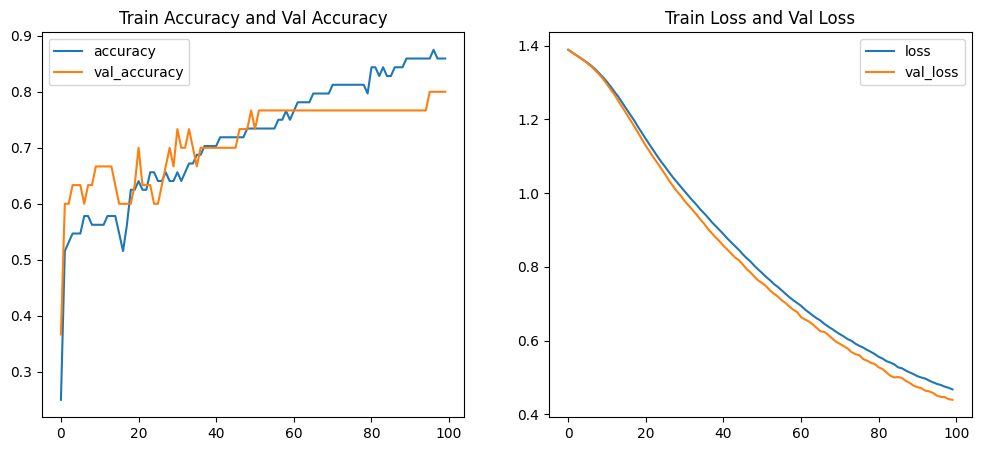

In [33]:
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])

## Making Predictions

In [34]:
#Evaluation of model on test dataset.
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.5790 - accuracy: 0.7857


[0.5790198445320129, 0.7857142686843872]

In [35]:
#Prediction on X_test
preds_X_test = model.predict(X_test)
#Decode Y_test and predictions on X_test
y_test = [np.argmax(y_test[i]) for i in range(len(y_test))]
preds_X_test_decoded = [np.argmax(preds_X_test[i]) for i in range(len(preds_X_test))]

1/1 [==============================] - 0s 113ms/step


## Evaluation

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds_X_test_decoded))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         6

    accuracy                           0.79        14
   macro avg       0.81      0.88      0.80        14
weighted avg       0.86      0.79      0.77        14

